In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [2]:
df = pd.read_csv("haberman.csv", names=["age", "operation_year", "num_pos_detected", "survival_status"])
df.shape

(306, 4)

In [3]:
df.head()

,age,operation_year,num_pos_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
cph = CoxPHFitter()

In [5]:
cph.fit(
    df, 
    "age", 
    event_col="survival_status"
)

<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>

In [6]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'age'
                event col = 'survival_status'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2023-02-13 14:36:57 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
operation_year    -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
num_pos_detected   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

                     z    p   -log2(p)
covariate                             
operation_year   -1.39 0.16       2.61
num_pos_detected  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25

<AxesSubplot:xlabel='log(HR) (95% CI)'>

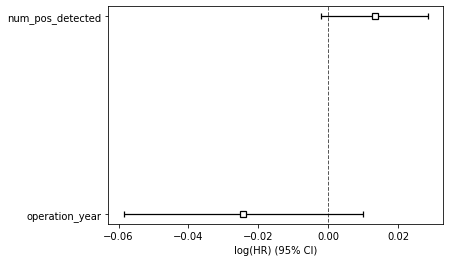

In [7]:
cph.plot()

The summary statistics above indicates the significance of the covariates in predicting the Survival risk. both features play a tiny significant role in predicting the survival. The large CI indicates that more data are needed.

In [8]:
sample = df.sample(3)[["operation_year", "num_pos_detected"]]
sample.head()

,operation_year,num_pos_detected
160,63,24
263,64,0
239,58,0


<AxesSubplot:>

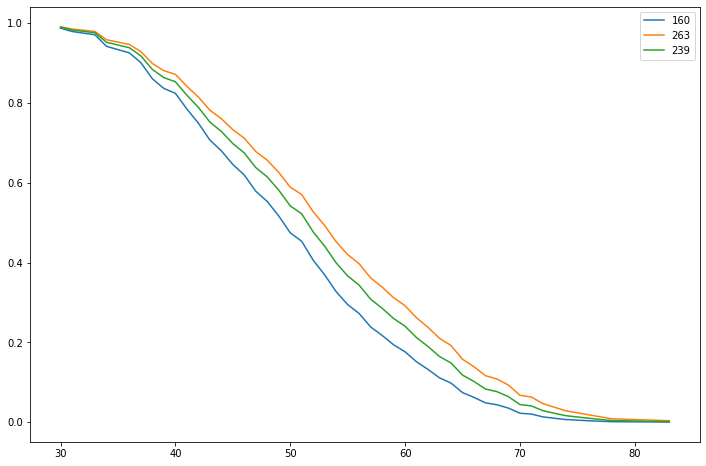

In [9]:
cph.predict_survival_function(sample).plot(figsize=(12, 8))

Shows the survival curves at customer level. It shows the survival curves for three randomly selected patients.